# Contents

- [EDA and Data Cleaning](#EDA-and-Data-Cleaning)

# Load libraries

In [998]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [884]:
# load csv

adult_mortality = pd.read_csv('../data/Adult mortality.csv')
maternal_mortality = pd.read_csv('../data/Maternal mortality.csv')
num_death = pd.read_csv('../data/Number of deaths (thousands).csv')
prob_dying = pd.read_csv('../data/Probability of dying per 1000 live births.csv')

# Data Cleaning

## Check contents of dataframes 


In [885]:
adult_mortality.head()

,Unnamed: 0,Unnamed: 1,Adult mortality rate (probability of dying between 15 and 60 years per 1000 population),Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).1,Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).2
0,Country,Year,Both sexes,Male,Female
1,Afghanistan,2016,245,272,216
2,Afghanistan,2015,233,254,210
3,Afghanistan,2014,234,254,213
4,Afghanistan,2013,235,254,215


In [886]:
adult_mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 5 columns):
 #   Column                                                                                     Non-Null Count  Dtype 
---  ------                                                                                     --------------  ----- 
 0   Unnamed: 0                                                                                 3112 non-null   object
 1   Unnamed: 1                                                                                 3112 non-null   object
 2   Adult mortality rate (probability of dying between 15 and 60 years per 1000 population)    3112 non-null   object
 3   Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).1  3112 non-null   object
 4   Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).2  3112 non-null   object
dtypes: object(5)
memory usage: 121.7+ KB


Columns # 1,2,3,4 contains object likely because of the Row 0 as it contains gender as a `sub-header`

Also dtype for columns 2,3,4 are in Object. after cleaning, should be converted to integers


In [887]:
maternal_mortality.head()

,Country,Year,Maternal mortality ratio (per 100 000 live births),Number of maternal deaths
0,Afghanistan,2017,638 [ 427 - 1 010 ],7 700 [ 5 100 - 12 000 ]
1,Afghanistan,2016,673 [ 457 - 1 040 ],8 100 [ 5 500 - 12 000 ]
2,Afghanistan,2015,701 [ 501 - 1 020 ],8 400 [ 6 000 - 12 000 ]
3,Afghanistan,2014,786 [ 592 - 1 080 ],9 300 [ 7 000 - 13 000 ]
4,Afghanistan,2013,810 [ 617 - 1 080 ],9 600 [ 7 300 - 13 000 ]


If needed, we can establish range for maternal mortality ratio. 

For now we can take in the first value outside the square brackets 

In [888]:
num_death.head()

,Unnamed: 0,Unnamed: 1,Number of under-five deaths (thousands),Number of under-five deaths (thousands).1,Number of under-five deaths (thousands).2,Number of infant deaths (thousands),Number of infant deaths (thousands).1,Number of infant deaths (thousands).2,Number of neonatal deaths (thousands)
0,Country,Year,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes
1,Afghanistan,2018,74278,40312,33966,57182,31394,25788,44725
2,Afghanistan,2017,76877,41631,35246,58846,32244,26602,45771
3,Afghanistan,2016,79770,43134,36636,60673,33222,27451,46963
4,Afghanistan,2015,82918,44733,38185,62652,34257,28395,48237


In [889]:
prob_dying.head()

,Unnamed: 0,Unnamed: 1,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Infant mortality rate (probability of dying between birth and age 1 per 1000 live births).1,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births).2,Neonatal mortality rate (per 1000 live births),Under-five mortality rate (probability of dying by age 5 per 1000 live births),Under-five mortality rate (probability of dying by age 5 per 1000 live births).1,Under-five mortality rate (probability of dying by age 5 per 1000 live births).2
0,Country,Year,Both sexes,Male,Female,Both sexes,Both sexes,Male,Female
1,Afghanistan,2018,47.9,51.1,44.5,37.1,62.3,65.7,58.7
2,Afghanistan,2017,49.5,52.7,46,38.1,64.7,68.1,61.1
3,Afghanistan,2016,51.2,54.5,47.7,39.3,67.5,70.9,63.7
4,Afghanistan,2015,53.1,56.5,49.6,40.5,70.4,73.8,66.7


## Check for missing values

In [890]:
adult_mortality.isnull().sum()

Unnamed: 0                                                                                   0
Unnamed: 1                                                                                   0
Adult mortality rate (probability of dying between 15 and 60 years per 1000 population)      0
Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).1    0
Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).2    0
dtype: int64

In [891]:
maternal_mortality.isnull().sum()

Country                                               0
Year                                                  0
Maternal mortality ratio (per 100 000 live births)    0
Number of maternal deaths                             0
dtype: int64

In [892]:
num_death.isnull().sum()

Unnamed: 0                                   0
Unnamed: 1                                   0
Number of under-five deaths (thousands)      0
Number of under-five deaths (thousands).1    0
Number of under-five deaths (thousands).2    0
Number of infant deaths (thousands)          0
Number of infant deaths (thousands).1        0
Number of infant deaths (thousands).2        0
Number of neonatal deaths (thousands)        0
dtype: int64

In [893]:
prob_dying.isnull().sum()

Unnamed: 0                                                                                     0
Unnamed: 1                                                                                     0
Infant mortality rate (probability of dying between birth and age 1 per 1000 live births)      0
Infant mortality rate (probability of dying between birth and age 1 per 1000 live births).1    0
Infant mortality rate (probability of dying between birth and age 1 per 1000 live births).2    0
Neonatal mortality rate (per 1000 live births)                                                 0
Under-five mortality rate (probability of dying by age 5 per 1000 live births)                 0
Under-five mortality rate (probability of dying by age 5 per 1000 live births).1               0
Under-five mortality rate (probability of dying by age 5 per 1000 live births).2               0
dtype: int64

## Compress data by Sex

We can see that the column of interest is `Adult mortality rate (probability of dying between 15 and 60 years per 1000 population)` split into 3 categories based on gender. 

The cells below will show the flow of how a function is created to generate compressed dataframe, with additional column called 'Gender' 

### Sample compressing work flow for `Adult Mortality`

In [894]:
col_of_interest = adult_mortality.columns[2]
col_of_interest

'Adult mortality rate (probability of dying between 15 and 60 years per 1000 population)'

In [895]:
gender_category = adult_mortality.iloc[0,2:].tolist()
gender_category

['Both sexes', 'Male', 'Female']

In [896]:
adult_mortality_compressed = adult_mortality.copy()

adult_mortality_compressed.columns = adult_mortality.iloc[0,:]

adult_mortality_compressed.drop(0, inplace = True )

In [897]:
adult_mortality_compressed.reset_index(inplace = True, drop = True)

In [898]:
adult_mortality_compressed

,Country,Year,Both sexes,Male,Female
0,Afghanistan,2016,245,272,216
1,Afghanistan,2015,233,254,210
2,Afghanistan,2014,234,254,213
3,Afghanistan,2013,235,254,215
4,Afghanistan,2012,242,262,221
...,...,...,...,...,...
3106,Zimbabwe,2004,694,725,670
3107,Zimbabwe,2003,697,728,671
3108,Zimbabwe,2002,695,728,667
3109,Zimbabwe,2001,688,723,656


In [899]:
def rename_columns(df, col_of_interest):

    # establish list of columns to be your new header
    col_list = ['Country', 'Year',col_of_interest, 'Sex']

    # replace df columns with col_list
    df.columns = col_list

    return df

In [900]:
def create_df(ori_df, which_sex):

    # copy main df
    df = ori_df.copy()

    # add one more column to display and segregate by Sex column 
    df['Sex'] = which_sex
    
    return df

In [901]:
create_df(adult_mortality_compressed[['Country','Year', 'Male']], 'Male')

,Country,Year,Male,Sex
0,Afghanistan,2016,272,Male
1,Afghanistan,2015,254,Male
2,Afghanistan,2014,254,Male
3,Afghanistan,2013,254,Male
4,Afghanistan,2012,262,Male
...,...,...,...,...
3106,Zimbabwe,2004,725,Male
3107,Zimbabwe,2003,728,Male
3108,Zimbabwe,2002,728,Male
3109,Zimbabwe,2001,723,Male


In [902]:
def generateList_df(df, col_of_interest, gender_cat):

    # instantiate empty list
    empty_list = []

    # for each gender, create separate table 
    # then append into empty list 
    for cat in gender_cat:
        df_new = create_df(df[['Country','Year', cat]], cat)
        empty_list.append(rename_columns(df_new, col_of_interest))

    return empty_list

In [903]:
adult_mortality_compressed =  pd.concat(generateList_df(adult_mortality_compressed,col_of_interest, gender_category))

adult_mortality_compressed

,Country,Year,Adult mortality rate (probability of dying between 15 and 60 years per 1000 population),Sex
0,Afghanistan,2016,245,Both sexes
1,Afghanistan,2015,233,Both sexes
2,Afghanistan,2014,234,Both sexes
3,Afghanistan,2013,235,Both sexes
4,Afghanistan,2012,242,Both sexes
...,...,...,...,...
3106,Zimbabwe,2004,670,Female
3107,Zimbabwe,2003,671,Female
3108,Zimbabwe,2002,667,Female
3109,Zimbabwe,2001,656,Female


The output of this compressed file will only contain one main topic, segregated by sex by another column. 

This output will be done across other files and merged by Country, Year, Sex. 

Final compressed file for adult mortality will be created using the function below.

In [904]:
# define a function that creates compressed table 
# assuming column 2 is the only main column of interest (already filtered by only One topic)

def compress_df(df, col_of_interest):
    # establish gender category 
    gender_category = df.iloc[0,2:].tolist()

    # copy out original
    df_compress = df.copy()

    # make first row the header, and reset index
    df_compress.columns = df.iloc[0,:]
    df_compress.drop(0, inplace = True )
    df_compress.reset_index(inplace = True, drop = True)
    
    # use generateList_df to get new dataframe with only one column of interest segregated by sex category on a new column
    df_compress = pd.concat(generateList_df(df_compress,col_of_interest,gender_category))
    
    # convert all to lower caps for columns 
    df_compress.columns = [x.lower() for x in df_compress.columns.tolist()]
    
    return df_compress

### Compress Adult Mortality

In [905]:
adult_mort_comp = compress_df(adult_mortality, 'adult_mortality')

In [906]:
adult_mort_comp

,country,year,adult_mortality,sex
0,Afghanistan,2016,245,Both sexes
1,Afghanistan,2015,233,Both sexes
2,Afghanistan,2014,234,Both sexes
3,Afghanistan,2013,235,Both sexes
4,Afghanistan,2012,242,Both sexes
...,...,...,...,...
3106,Zimbabwe,2004,670,Female
3107,Zimbabwe,2003,671,Female
3108,Zimbabwe,2002,667,Female
3109,Zimbabwe,2001,656,Female


### Compress Number of Death under 5 years old

In [907]:
num_underfivedeath_df = compress_df(num_death[['Unnamed: 0', 'Unnamed: 1', 'Number of under-five deaths (thousands)',
       'Number of under-five deaths (thousands).1',
       'Number of under-five deaths (thousands).2']], 'no_underfivedeath')

In [908]:
num_underfivedeath_df

,country,year,no_underfivedeath,sex
0,Afghanistan,2018,74278,Both sexes
1,Afghanistan,2017,76877,Both sexes
2,Afghanistan,2016,79770,Both sexes
3,Afghanistan,2015,82918,Both sexes
4,Afghanistan,2014,86378,Both sexes
...,...,...,...,...
1159,Zimbabwe,2017,10100,Female
1160,Zimbabwe,2016,10459,Female
1161,Zimbabwe,2015,11432,Female
1162,Zimbabwe,2014,12192,Female


### Compress Number of Infant Death

In [909]:
num_infantDeath_df = compress_df(num_death[['Unnamed: 0', 'Unnamed: 1','Number of infant deaths (thousands)',
       'Number of infant deaths (thousands).1',
       'Number of infant deaths (thousands).2']], 'no_infant_death')

In [910]:
num_infantDeath_df

,country,year,no_infant_death,sex
0,Afghanistan,2018,57182,Both sexes
1,Afghanistan,2017,58846,Both sexes
2,Afghanistan,2016,60673,Both sexes
3,Afghanistan,2015,62652,Both sexes
4,Afghanistan,2014,64808,Both sexes
...,...,...,...,...
1159,Zimbabwe,2017,7005,Female
1160,Zimbabwe,2016,7297,Female
1161,Zimbabwe,2015,7885,Female
1162,Zimbabwe,2014,8344,Female


### Compress Prob of Infant Mortality Rate

In [911]:
prob_infantDeath_df = compress_df(prob_dying[['Unnamed: 0', 'Unnamed: 1',
       'Infant mortality rate (probability of dying between birth and age 1 per 1000 live births)',
       'Infant mortality rate (probability of dying between birth and age 1 per 1000 live births).1',
       'Infant mortality rate (probability of dying between birth and age 1 per 1000 live births).2']], 'prob_infant_death')

In [912]:
prob_infantDeath_df

,country,year,prob_infant_death,sex
0,Afghanistan,2018,47.9,Both sexes
1,Afghanistan,2017,49.5,Both sexes
2,Afghanistan,2016,51.2,Both sexes
3,Afghanistan,2015,53.1,Both sexes
4,Afghanistan,2014,55.1,Both sexes
...,...,...,...,...
1159,Zimbabwe,2017,31.2,Female
1160,Zimbabwe,2016,32,Female
1161,Zimbabwe,2015,34,Female
1162,Zimbabwe,2014,35.6,Female


### Compress Prob of under 5 years old Mortality Rate

In [913]:
prob_underfivedeath_df = compress_df(prob_dying[['Unnamed: 0', 'Unnamed: 1',
       'Under-five mortality rate (probability of dying by age 5 per 1000 live births)',
       'Under-five mortality rate (probability of dying by age 5 per 1000 live births).1',
       'Under-five mortality rate (probability of dying by age 5 per 1000 live births).2']], 'prob_underfivedeath')

In [914]:
prob_underfivedeath_df

,country,year,prob_underfivedeath,sex
0,Afghanistan,2018,62.3,Both sexes
1,Afghanistan,2017,64.7,Both sexes
2,Afghanistan,2016,67.5,Both sexes
3,Afghanistan,2015,70.4,Both sexes
4,Afghanistan,2014,73.6,Both sexes
...,...,...,...,...
1159,Zimbabwe,2017,44.5,Female
1160,Zimbabwe,2016,45.5,Female
1161,Zimbabwe,2015,49.2,Female
1162,Zimbabwe,2014,52.3,Female


## Strip strings and Convert to datetime and float 

In [915]:
# compile all data
data_list = [adult_mort_comp, num_infantDeath_df, num_underfivedeath_df, prob_infantDeath_df, prob_underfivedeath_df]

In [916]:
# strip off spaces before and after words in columns 

for data in data_list: 
    data.sex = data.sex.apply(lambda x: ' '.join(x.split()))
    data.year = data.year.apply(lambda x: ''.join(x.split()))

In [917]:
# convert all to datetime 

for data in data_list:
    data['year'] = pd.to_datetime(data['year'])
    data['year'] = data['year'].dt.year  

In [918]:
# convert to float 
for data in data_list:
    data.iloc[:,2] = data.iloc[:,2].astype(float)

## Clean Maternal Mortality

In [919]:
# how many unique years 
maternal_mortality.Year.unique()

array([2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007,
       2006, 2005, 2004, 2003, 2002, 2001, 2000], dtype=int64)

In [920]:
maternal_mortality.sort_values(by = 'Number of maternal deaths')

,Country,Year,Maternal mortality ratio (per 100 000 live births),Number of maternal deaths
1348,Iceland,2001,6 [ 4 - 9 ],[ - ]
1865,Malta,2006,8 [ 5 - 13 ],[ - ]
1349,Iceland,2000,6 [ 4 - 9 ],[ - ]
1863,Malta,2008,8 [ 5 - 12 ],[ - ]
1862,Malta,2009,7 [ 5 - 12 ],[ - ]
...,...,...,...,...
2449,Rwanda,2016,260 [ 194 - 357 ],990 [ 740 - 1 400 ]
681,Congo,2002,769 [ 604 - 974 ],990 [ 770 - 1 200 ]
903,Egypt,2014,39 [ 31 - 47 ],990 [ 790 - 1 200 ]
906,Egypt,2011,42 [ 35 - 49 ],990 [ 830 - 1 200 ]


In [921]:
maternal_mortality.groupby('Number of maternal deaths').count()

,Country,Year,Maternal mortality ratio (per 100 000 live births)
Number of maternal deaths,,,
[ - ],32,32,32
[ - 1 ],30,30,30
1 000 [ 640 - 1 700 ],1,1,1
1 000 [ 700 - 1 400 ],2,2,2
1 000 [ 710 - 1 400 ],2,2,2
...,...,...,...
990 [ 740 - 1 400 ],1,1,1
990 [ 770 - 1 200 ],1,1,1
990 [ 790 - 1 200 ],1,1,1


In [922]:
maternal_mortality.groupby('Number of maternal deaths').count().reset_index()['Number of maternal deaths'][0:2]

0      [  -  ]
1     [  - 1 ]
Name: Number of maternal deaths, dtype: object

We can look into the 32 countries that has no number of maternal deaths and see how to impute them 

In [923]:
maternal_mortality[maternal_mortality['Number of maternal deaths'] == ' [  -  ]']

,Country,Year,Maternal mortality ratio (per 100 000 live births),Number of maternal deaths
1332,Iceland,2017,4 [ 2 - 6 ],[ - ]
1333,Iceland,2016,4 [ 2 - 7 ],[ - ]
1334,Iceland,2015,4 [ 2 - 6 ],[ - ]
1335,Iceland,2014,5 [ 3 - 8 ],[ - ]
1336,Iceland,2013,4 [ 3 - 7 ],[ - ]
1337,Iceland,2012,4 [ 2 - 6 ],[ - ]
1338,Iceland,2011,5 [ 3 - 7 ],[ - ]
1339,Iceland,2010,5 [ 3 - 7 ],[ - ]
1340,Iceland,2009,5 [ 3 - 8 ],[ - ]
1341,Iceland,2008,5 [ 3 - 7 ],[ - ]


In [924]:
maternal_mortality[maternal_mortality['Number of maternal deaths'] == ' [  - 1 ]']

,Country,Year,Maternal mortality ratio (per 100 000 live births),Number of maternal deaths
1188,Grenada,2017,25 [ 15 - 39 ],[ - 1 ]
1189,Grenada,2016,25 [ 16 - 38 ],[ - 1 ]
1190,Grenada,2015,25 [ 16 - 38 ],[ - 1 ]
1191,Grenada,2014,26 [ 16 - 39 ],[ - 1 ]
1192,Grenada,2013,27 [ 17 - 40 ],[ - 1 ]
1747,Luxembourg,2016,5 [ 3 - 9 ],[ - 1 ]
1749,Luxembourg,2014,6 [ 4 - 9 ],[ - 1 ]
1750,Luxembourg,2013,6 [ 4 - 10 ],[ - 1 ]
1751,Luxembourg,2012,7 [ 5 - 11 ],[ - 1 ]
1752,Luxembourg,2011,8 [ 5 - 12 ],[ - 1 ]


In [925]:
maternal_mortality[maternal_mortality['Country'] == 'Montenegro']

,Country,Year,Maternal mortality ratio (per 100 000 live births),Number of maternal deaths
1962,Montenegro,2017,6 [ 3 - 10 ],[ - 1 ]
1963,Montenegro,2016,6 [ 3 - 10 ],[ - 1 ]
1964,Montenegro,2015,6 [ 3 - 10 ],[ - 1 ]
1965,Montenegro,2014,6 [ 3 - 11 ],[ - 1 ]
1966,Montenegro,2013,6 [ 4 - 11 ],[ - 1 ]
1967,Montenegro,2012,7 [ 4 - 11 ],1 [ - 1 ]
1968,Montenegro,2011,7 [ 4 - 12 ],1 [ - 1 ]
1969,Montenegro,2010,7 [ 4 - 12 ],1 [ - 1 ]
1970,Montenegro,2009,8 [ 4 - 13 ],1 [ - 1 ]
1971,Montenegro,2008,8 [ 4 - 13 ],1 [ - 1 ]


We can impute the number of maternal death as 0 since mortality ratio super low indicating that the risk of dying by after giving birth is low. 

In [926]:
# rename columns to lowercase
maternal_mortality.columns = ['country','year','maternal_ratio','num_maternaldeath']

In [927]:
# change maternal ratio to integers taking only numbers outside of square brackets 
maternal_mortality['maternal_ratio'] = maternal_mortality['maternal_ratio'].apply(lambda x: int(x.split()[0]))

In [928]:
# change maternal death taking only numbers outside of square brackets 
maternal_mortality['num_maternaldeath'] = maternal_mortality['num_maternaldeath'].apply(lambda x:  \
        # if two elements after split are digits, returns first 2 numbers, combine and convert to integer  
        int(''.join(x.split()[:2])) if (x.split()[1].isdigit() and x.split()[0].isdigit())\

        # impute 0 if first element starts with '['
        else 0 if (x.split()[0] == '[')\

        # returns first number if first two elements after split is NOT digits (this applies for numbers below 1000)
        else int(x.split()[0]))

In [929]:
# Check if has anymore [-]
maternal_mortality.groupby('num_maternaldeath').count()

,country,year,maternal_ratio
num_maternaldeath,,,
0,62,62,62
1,123,123,123
2,135,135,135
3,155,155,155
4,125,125,125
...,...,...,...
84000,1,1,1
89000,1,1,1
94000,1,1,1


In [930]:
# check if values imputed correctly 
maternal_mortality[maternal_mortality.country == 'Montenegro']

,country,year,maternal_ratio,num_maternaldeath
1962,Montenegro,2017,6,0
1963,Montenegro,2016,6,0
1964,Montenegro,2015,6,0
1965,Montenegro,2014,6,0
1966,Montenegro,2013,6,0
1967,Montenegro,2012,7,1
1968,Montenegro,2011,7,1
1969,Montenegro,2010,7,1
1970,Montenegro,2009,8,1
1971,Montenegro,2008,8,1


In [931]:
maternal_mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   country            3294 non-null   object
 1   year               3294 non-null   int64 
 2   maternal_ratio     3294 non-null   int64 
 3   num_maternaldeath  3294 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 103.1+ KB


## Combine dataset

Expecting to only have data from 2013 to 2018

In [932]:
adult_mort_comp.columns

Index(['country', 'year', 'adult_mortality', 'sex'], dtype='object')

In [933]:
combine_df = pd.merge(adult_mort_comp, num_underfivedeath_df, on = ['country', 'year', 'sex'], how = 'inner')
combine_df = combine_df[['country', 'year', 'sex', 'adult_mortality', 'no_underfivedeath']]

In [934]:
combine_df = pd.merge(combine_df, num_infantDeath_df, on = ['country', 'year', 'sex'], how = 'inner')
combine_df

,country,year,sex,adult_mortality,no_underfivedeath,no_infant_death
0,Afghanistan,2016,Both sexes,245.0,79770.0,60673.0
1,Afghanistan,2015,Both sexes,233.0,82918.0,62652.0
2,Afghanistan,2014,Both sexes,234.0,86378.0,64808.0
3,Afghanistan,2013,Both sexes,235.0,90103.0,67154.0
4,Albania,2016,Both sexes,96.0,326.0,289.0
...,...,...,...,...,...,...
2191,Zambia,2013,Female,277.0,18411.0,12415.0
2192,Zimbabwe,2016,Female,303.0,10459.0,7297.0
2193,Zimbabwe,2015,Female,314.0,11432.0,7885.0
2194,Zimbabwe,2014,Female,328.0,12192.0,8344.0


In [935]:
combine_df = pd.merge(combine_df, prob_infantDeath_df, on = ['country', 'year', 'sex'], how = 'inner')
combine_df

,country,year,sex,adult_mortality,no_underfivedeath,no_infant_death,prob_infant_death
0,Afghanistan,2016,Both sexes,245.0,79770.0,60673.0,51.2
1,Afghanistan,2015,Both sexes,233.0,82918.0,62652.0,53.1
2,Afghanistan,2014,Both sexes,234.0,86378.0,64808.0,55.1
3,Afghanistan,2013,Both sexes,235.0,90103.0,67154.0,57.3
4,Albania,2016,Both sexes,96.0,326.0,289.0,8.2
...,...,...,...,...,...,...,...
2191,Zambia,2013,Female,277.0,18411.0,12415.0,43.4
2192,Zimbabwe,2016,Female,303.0,10459.0,7297.0,32.0
2193,Zimbabwe,2015,Female,314.0,11432.0,7885.0,34.0
2194,Zimbabwe,2014,Female,328.0,12192.0,8344.0,35.6


In [936]:
combine_df = pd.merge(combine_df, prob_underfivedeath_df, on = ['country', 'year', 'sex'], how = 'inner')
combine_df

,country,year,sex,adult_mortality,no_underfivedeath,no_infant_death,prob_infant_death,prob_underfivedeath
0,Afghanistan,2016,Both sexes,245.0,79770.0,60673.0,51.2,67.5
1,Afghanistan,2015,Both sexes,233.0,82918.0,62652.0,53.1,70.4
2,Afghanistan,2014,Both sexes,234.0,86378.0,64808.0,55.1,73.6
3,Afghanistan,2013,Both sexes,235.0,90103.0,67154.0,57.3,76.9
4,Albania,2016,Both sexes,96.0,326.0,289.0,8.2,9.3
...,...,...,...,...,...,...,...,...
2191,Zambia,2013,Female,277.0,18411.0,12415.0,43.4,65.1
2192,Zimbabwe,2016,Female,303.0,10459.0,7297.0,32.0,45.5
2193,Zimbabwe,2015,Female,314.0,11432.0,7885.0,34.0,49.2
2194,Zimbabwe,2014,Female,328.0,12192.0,8344.0,35.6,52.3


## Add column for continents 

In [937]:
continents_df = pd.read_csv('../data/country_continents.csv')
continents_df.columns = ['continents', 'country']
continents_df

,continents,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
212,South America,Suriname
213,South America,Uruguay
214,South America,Venezuela
215,South America,Bolivia (Plurinational State of)


In [938]:
combine_df = pd.merge(combine_df, continents_df, on = 'country', how = 'left')


In [939]:
# check for null values 
combine_df.isnull().sum()

country                0
year                   0
sex                    0
adult_mortality        0
no_underfivedeath      0
no_infant_death        0
prob_infant_death      0
prob_underfivedeath    0
continents             0
dtype: int64

In [947]:
adult_mort_comp = adult_mort_comp.merge(continents_df, on = 'country')

In [948]:
# check for null values 
adult_mort_comp.isnull().sum()

country            0
year               0
adult_mortality    0
sex                0
continents         0
dtype: int64

In [953]:
maternal_mortality = maternal_mortality.merge(continents_df, on= 'country')

In [954]:
# check for null values 
maternal_mortality.isnull().sum()

country              0
year                 0
maternal_ratio       0
num_maternaldeath    0
continents           0
dtype: int64

# EDA

What country and which year did Adult mortality decrease the most? And what did they do during that year? 

What country and which year did Maternal mortality decrease the most? And what did they do during that year? 

In [963]:
both_sex_df = combine_df[combine_df.sex == 'Both sexes']

In [973]:
both_sex_df

,country,year,sex,adult_mortality,no_underfivedeath,no_infant_death,prob_infant_death,prob_underfivedeath,continents
0,Afghanistan,2016,Both sexes,245.0,79770.0,60673.0,51.2,67.5,Asia
1,Afghanistan,2015,Both sexes,233.0,82918.0,62652.0,53.1,70.4,Asia
2,Afghanistan,2014,Both sexes,234.0,86378.0,64808.0,55.1,73.6,Asia
3,Afghanistan,2013,Both sexes,235.0,90103.0,67154.0,57.3,76.9,Asia
4,Albania,2016,Both sexes,96.0,326.0,289.0,8.2,9.3,Europe
...,...,...,...,...,...,...,...,...,...
727,Zambia,2013,Both sexes,311.0,40518.0,27726.0,47.8,70.7,Africa
728,Zimbabwe,2016,Both sexes,334.0,23326.0,16693.0,36.3,50.4,Africa
729,Zimbabwe,2015,Both sexes,346.0,25433.0,18006.0,38.5,54.3,Africa
730,Zimbabwe,2014,Both sexes,358.0,27058.0,19051.0,40.4,57.5,Africa


## Draw heatmap across mortality rates and year

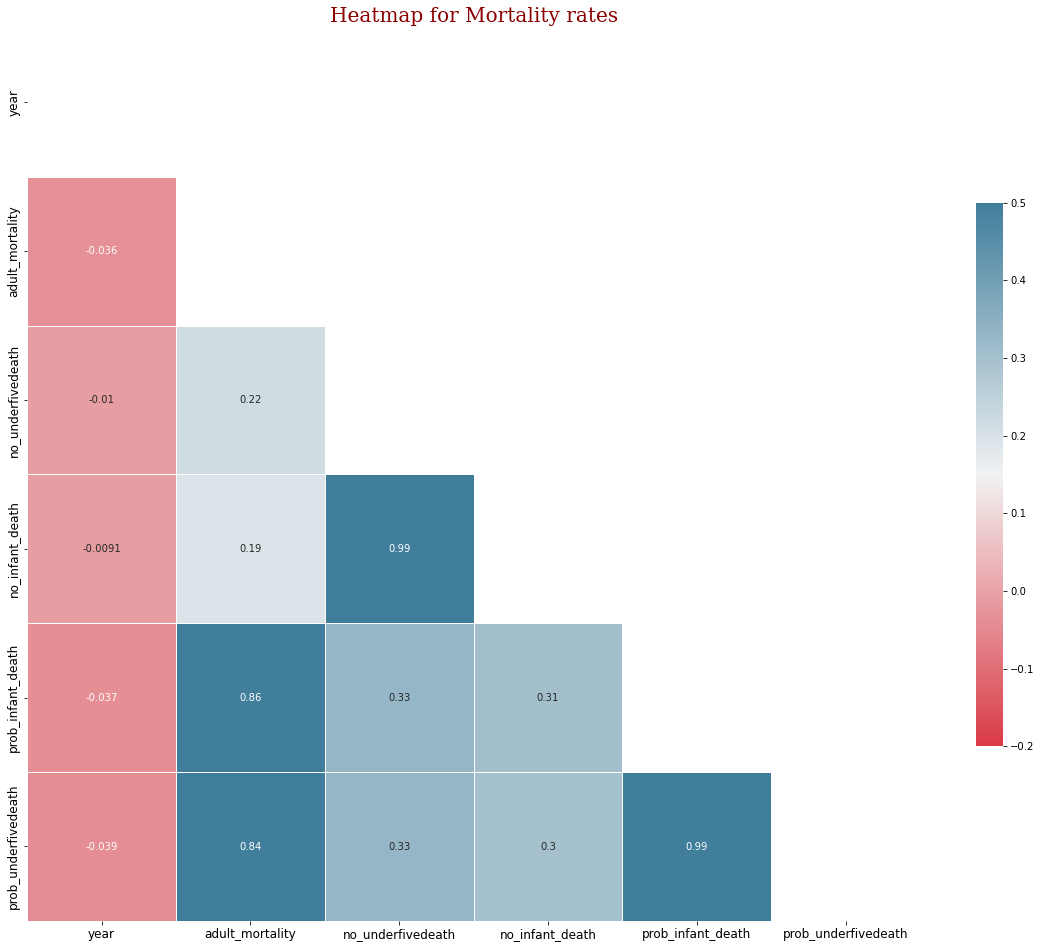

In [1027]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(both_sex_df.corr()))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 230, as_cmap=True)

# Draw the heatmap_df with the mask and correct aspect ratio
sns.heatmap(both_sex_df.corr(), mask=mask, cmap=cmap, vmax=0.5, vmin = -.2,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, annot = True)

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }
plt.title('Heatmap for Mortality rates', fontdict =font)
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

**Observations** 
- We can generally see negative correlation between years and mortality rates. Across years, both adult mortality rates and probability of infant death or death under 5 yrs old decreases. 
- Adult mortality is highly correlated with prob of infant death and death under 5 yrs old. This suggest that over the years, both decreases due to some shared reason. Some of the general reasons are access to nutrition, income, and other socioeconomic factors. 

## Which continent has the lowest and highest mortality rate for both sex?

In [981]:
result = both_sex_df[['country','continents','year','adult_mortality']].groupby(['continents', 'year']).mean()

In [985]:
result = result.reset_index()

In [992]:
result

,continents,year,adult_mortality
0,Africa,2013,272.000000
1,Africa,2014,269.981481
2,Africa,2015,262.685185
3,Africa,2016,256.740741
4,Asia,2013,143.295455
5,Asia,2014,142.704545
6,Asia,2015,139.704545
7,Asia,2016,136.454545
8,Europe,2013,98.380952
9,Europe,2014,96.500000


<AxesSubplot:xlabel='year', ylabel='adult_mortality'>

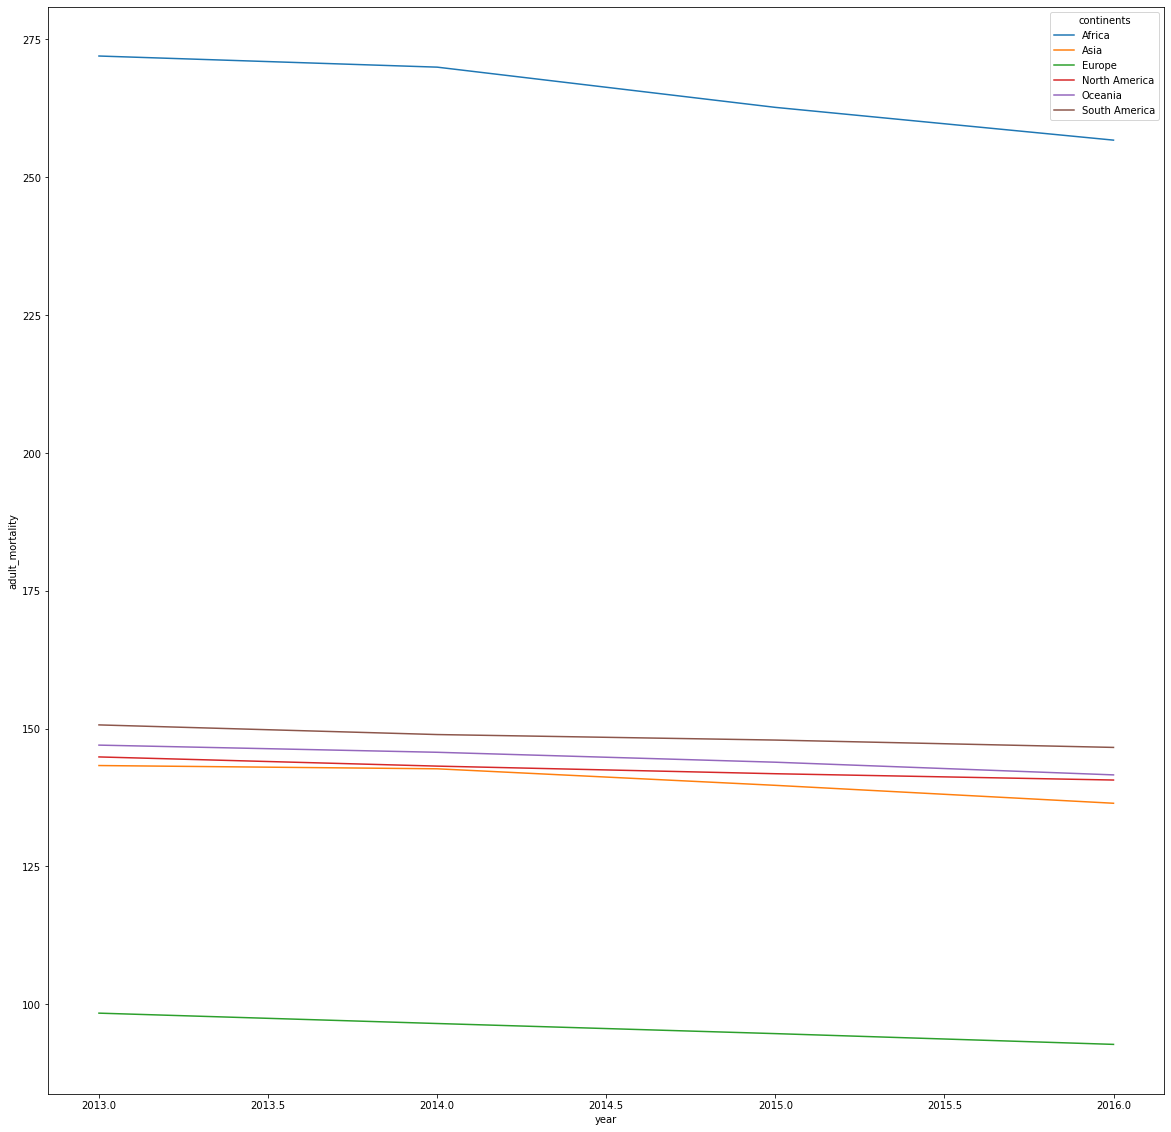

In [996]:
plt.figure(figsize=(20,20))
sns.lineplot(data = result, x = 'year', y = 'adult_mortality', hue = 'continents')

Europe has the least mortality rate while Africa has the highest mortality rates

Overall, there is decreasing trend of adult mortality rate across the years. 

## Show mortality rates for adults for Singapore

In [1057]:
singapore_adult_mort = adult_mort_comp[adult_mort_comp.country == 'Singapore']

In [1059]:
singapore_adult_mort.head(5)

,country,year,adult_mortality,sex,continents
7446,Singapore,2016,51.0,Both sexes,Asia
7447,Singapore,2015,54.0,Both sexes,Asia
7448,Singapore,2014,55.0,Both sexes,Asia
7449,Singapore,2013,56.0,Both sexes,Asia
7450,Singapore,2012,57.0,Both sexes,Asia


Text(0, 0.5, 'Adult Mortality Rate (prob of dying between 15-60 years per 1000 popn')

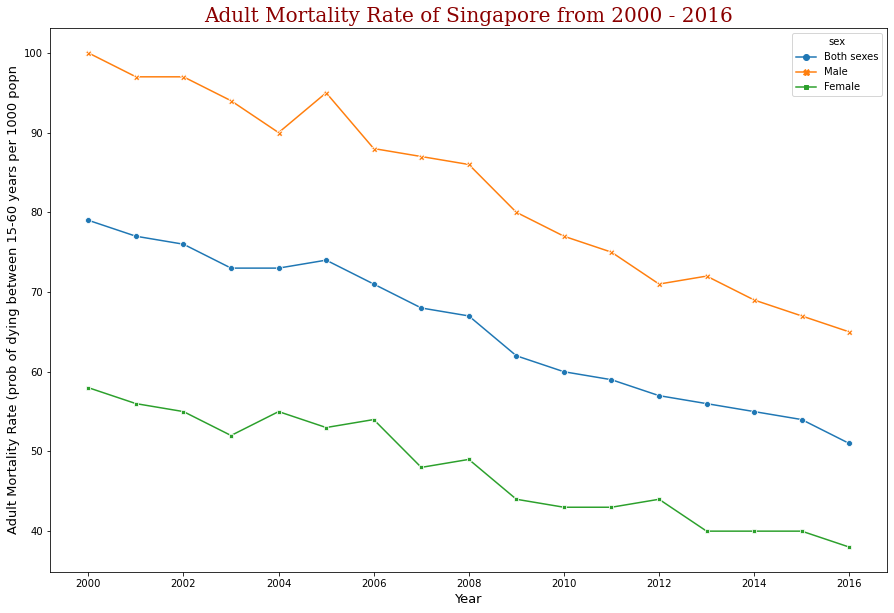

In [1080]:
plt.figure(figsize = (15,10))
sns.lineplot(data = singapore_adult_mort, x = 'year', y = 'adult_mortality', hue = 'sex', style = 'sex',markers=True, dashes=False)
plt.title('Adult Mortality Rate of Singapore from 2000 - 2016', fontdict = font)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Adult Mortality Rate (prob of dying between 15-60 years per 1000 popn', fontsize = 13)

In [1091]:
filter_year2000 = singapore_adult_mort[(singapore_adult_mort.year == 2000)][['adult_mortality','sex']]

In [1104]:
singapore_adult_mort = singapore_adult_mort.merge(filter_year2000, on  = 'sex', suffixes =('_current', '_year_2000'))

In [1111]:
singapore_adult_mort['Prct_change_since_2000'] = (singapore_adult_mort['adult_mortality_current'] - singapore_adult_mort['adult_mortality_year_2000']) / singapore_adult_mort['adult_mortality_year_2000'] * 100

In [1112]:
singapore_adult_mort[singapore_adult_mort.year == 2016]

,country,year,adult_mortality_current,sex,continents,adult_mortality_year_2000,Prct_change_since_2000
0,Singapore,2016,51.0,Both sexes,Asia,79.0,-35.443038
17,Singapore,2016,65.0,Male,Asia,100.0,-35.000000
34,Singapore,2016,38.0,Female,Asia,58.0,-34.482759


Over the past 16 years since 2000 to 2016, Singapore has seen a drop of 35% and 34.5% Mortality rate for both male and females respectively.

This translates to a significant drop of 2.2% each year. Seems like both men and women enjoy the same improvement in terms of health as measured by the percentage reduction

## In Europe find the most improvement in terms of mortality rates and how are the policies different from Singapore?